# Excercise 6.1
Time encoding for timestamps

## 1. Load the Bimsim Dataset

In [3]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
from math import cos, sin, pi
import os

!{sys.executable} -m pip install fastparquet pyarrow

Der Befehl "{sys.executable}" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [5]:
parquetFilename = r"./data/bimsim_31_day_sample_converted.parquet"
filename = r"./data/bimsim_31_day_sample.csv"
# filename = r"./data/07092021bimsim_room.csv"

isParquet = os.path.exists(parquetFilename)
if isParquet:
    %time data = pd.read_parquet(parquetFilename)
else:
    %time data = pd.read_csv(filename, sep=",")
data.head()   

CPU times: total: 46.9 ms
Wall time: 38.4 ms


,Unnamed: 0,source,datetime,id,celsius,pressure,humidity,sensor,room
0,0,0013A20041A94FA3,2021-08-18 09:40:38+00:00,1.629272e+09,23.144531,956.7491,42.368893,0013A20041A94FA3,H205
1,1,0013A20041A94FA3,2021-08-18 09:45:42+00:00,1.629273e+09,23.154882,956.8015,42.059960,0013A20041A94FA3,H205
2,2,0013A20041A94FA3,2021-08-18 09:50:45+00:00,1.629273e+09,23.165040,956.7753,42.528866,0013A20041A94FA3,H205
3,3,0013A20041A94FA3,2021-08-18 09:55:48+00:00,1.629273e+09,23.165040,956.7753,42.512318,0013A20041A94FA3,H205
4,4,0013A20041A94FA3,2021-08-18 10:00:52+00:00,1.629274e+09,23.180664,956.8277,42.291660,0013A20041A94FA3,H205


In [6]:
data.room.unique()

array(['H205', 'H113', 'H206', 'H211', 'H210', 'H220', 'H108', 'H110',
       'H106', 'across_from_H207_on_railing', 'H208', 'H109', 'H213',
       'H111', 'H207', 'H218', 'H212', 'H216_desk_at_window', 'H217',
       'H215', 'H209', 'H216', 'H214', 'H203'], dtype=object)

## 2. Transform the time column

In [7]:
if not isParquet:
    %time data["datetime"] = pd.to_datetime(data["datetime"],format='%a, %d %b %Y %H:%M:%S %Z')   
    #%time data["datetime"] = pd.to_datetime(data["datetime"],format='%Y-%m-%d %H:%M:%S.%f') 
    %time data.to_parquet(parquetFilename, compression="gzip") 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130887 entries, 0 to 130886
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   Unnamed: 0  130887 non-null  int64              
 1   source      130887 non-null  object             
 2   datetime    130887 non-null  datetime64[ns, GMT]
 3   id          130887 non-null  float64            
 4   celsius     130887 non-null  float64            
 5   pressure    130887 non-null  float64            
 6   humidity    130887 non-null  float64            
 7   sensor      130887 non-null  object             
 8   room        130887 non-null  object             
dtypes: datetime64[ns, GMT](1), float64(4), int64(1), object(3)
memory usage: 9.0+ MB


## 3. Create a column hour of day "HOD"
1. Extract the hour information from the timestamp column
2. Create a new column with that information

In [9]:
%time data["HOD"] = data["datetime"].dt.hour
data.head(5)

CPU times: total: 15.6 ms
Wall time: 13 ms


,Unnamed: 0,source,datetime,id,celsius,pressure,humidity,sensor,room,HOD
0,0,0013A20041A94FA3,2021-08-18 09:40:38+00:00,1.629272e+09,23.144531,956.7491,42.368893,0013A20041A94FA3,H205,9
1,1,0013A20041A94FA3,2021-08-18 09:45:42+00:00,1.629273e+09,23.154882,956.8015,42.059960,0013A20041A94FA3,H205,9
2,2,0013A20041A94FA3,2021-08-18 09:50:45+00:00,1.629273e+09,23.165040,956.7753,42.528866,0013A20041A94FA3,H205,9
3,3,0013A20041A94FA3,2021-08-18 09:55:48+00:00,1.629273e+09,23.165040,956.7753,42.512318,0013A20041A94FA3,H205,9
4,4,0013A20041A94FA3,2021-08-18 10:00:52+00:00,1.629274e+09,23.180664,956.8277,42.291660,0013A20041A94FA3,H205,10


In [10]:
np.sort(data["HOD"].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

## 4. Encode hour of day as sin/cos pair
1. Create first column "HOD_sin"
2. Create second column "HOD_cos"

In [11]:
%time data["HOD_sin"] = data["HOD"].map(lambda x : cos(2.0*pi*x/24.0))
%time data["HOD_cos"] = data["HOD"].map(lambda x : sin(2.0*pi*x/24.0))

CPU times: total: 78.1 ms
Wall time: 75.3 ms
CPU times: total: 62.5 ms
Wall time: 61.6 ms


In [12]:
data

,Unnamed: 0,source,datetime,id,celsius,pressure,humidity,sensor,room,HOD,HOD_sin,HOD_cos
0,0,0013A20041A94FA3,2021-08-18 09:40:38+00:00,1.629272e+09,23.144531,956.74910,42.368893,0013A20041A94FA3,H205,9,-0.707107,0.707107
1,1,0013A20041A94FA3,2021-08-18 09:45:42+00:00,1.629273e+09,23.154882,956.80150,42.059960,0013A20041A94FA3,H205,9,-0.707107,0.707107
2,2,0013A20041A94FA3,2021-08-18 09:50:45+00:00,1.629273e+09,23.165040,956.77530,42.528866,0013A20041A94FA3,H205,9,-0.707107,0.707107
3,3,0013A20041A94FA3,2021-08-18 09:55:48+00:00,1.629273e+09,23.165040,956.77530,42.512318,0013A20041A94FA3,H205,9,-0.707107,0.707107
4,4,0013A20041A94FA3,2021-08-18 10:00:52+00:00,1.629274e+09,23.180664,956.82770,42.291660,0013A20041A94FA3,H205,10,-0.866025,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
130882,130882,0013A20041A94BE7,2021-08-26 01:37:53+00:00,1.629935e+09,24.253515,954.70685,42.350620,0013A20041A94BE7,H203,1,0.965926,0.258819
130883,130883,0013A20041A94BE7,2021-08-26 01:42:56+00:00,1.629935e+09,24.243555,954.60223,42.545727,0013A20041A94BE7,H203,1,0.965926,0.258819
130884,130884,0013A20041A94BE7,2021-08-26 01:47:59+00:00,1.629935e+09,24.243555,954.52374,42.634914,0013A20041A94BE7,H203,1,0.965926,0.258819
130885,130885,0013A20041A94BE7,2021-08-26 01:53:02+00:00,1.629936e+09,24.238476,954.49760,42.166650,0013A20041A94BE7,H203,1,0.965926,0.258819


In [13]:
display(abs(data["HOD_sin"]).min(), abs(data["HOD_sin"]).max())

6.123233995736766e-17

1.0

## 4. Check the results

<Axes: xlabel='HOD_sin', ylabel='HOD_cos'>

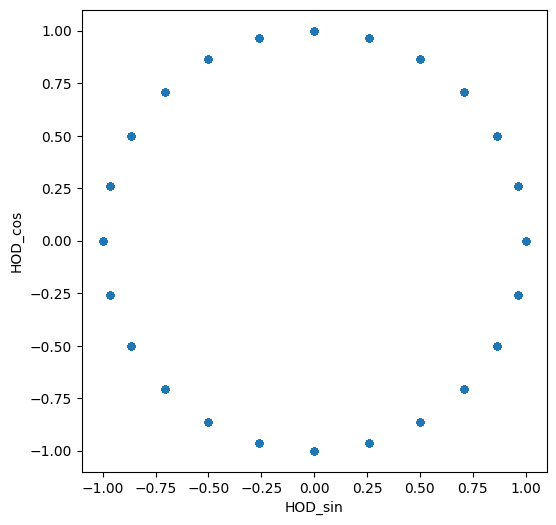

In [15]:
import matplotlib.pyplot as plt

data.plot.scatter(x = "HOD_sin", y = "HOD_cos", figsize=(6, 6))

In [11]:
## 5. Optional: Save the resulting dataframe
resFilename = r"./bimsim_conv.parquet"
%time data.to_parquet(resFilename, compression="gzip")

CPU times: total: 547 ms
Wall time: 491 ms


## 5 Encode day of week as one-hot encoding

In [16]:
%time data = data.join(pd.get_dummies(data["datetime"].dt.weekday))

CPU times: total: 31.2 ms
Wall time: 37.1 ms


In [17]:
data = data.rename(columns= {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"} )

In [18]:
data.head(10)

,Unnamed: 0,source,datetime,id,celsius,pressure,humidity,sensor,room,HOD,HOD_sin,HOD_cos,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,0013A20041A94FA3,2021-08-18 09:40:38+00:00,1.629272e+09,23.144531,956.74910,42.368893,0013A20041A94FA3,H205,9,-0.707107,0.707107,False,False,True,False,False,False,False
1,1,0013A20041A94FA3,2021-08-18 09:45:42+00:00,1.629273e+09,23.154882,956.80150,42.059960,0013A20041A94FA3,H205,9,-0.707107,0.707107,False,False,True,False,False,False,False
2,2,0013A20041A94FA3,2021-08-18 09:50:45+00:00,1.629273e+09,23.165040,956.77530,42.528866,0013A20041A94FA3,H205,9,-0.707107,0.707107,False,False,True,False,False,False,False
3,3,0013A20041A94FA3,2021-08-18 09:55:48+00:00,1.629273e+09,23.165040,956.77530,42.512318,0013A20041A94FA3,H205,9,-0.707107,0.707107,False,False,True,False,False,False,False
4,4,0013A20041A94FA3,2021-08-18 10:00:52+00:00,1.629274e+09,23.180664,956.82770,42.291660,0013A20041A94FA3,H205,10,-0.866025,0.500000,False,False,True,False,False,False,False
5,5,0013A20041A94FA3,2021-08-18 10:05:55+00:00,1.629274e+09,23.190820,956.80150,42.688830,0013A20041A94FA3,H205,10,-0.866025,0.500000,False,False,True,False,False,False,False
6,6,0013A20041A94FA3,2021-08-18 10:10:59+00:00,1.629274e+09,23.190820,956.80150,42.892914,0013A20041A94FA3,H205,10,-0.866025,0.500000,False,False,True,False,False,False,False
7,7,0013A20041A94FA3,2021-08-18 10:16:02+00:00,1.629275e+09,23.180664,956.93250,42.650220,0013A20041A94FA3,H205,10,-0.866025,0.500000,False,False,True,False,False,False,False
8,8,0013A20041A94FA3,2021-08-18 10:21:06+00:00,1.629275e+09,23.180664,956.98490,42.490253,0013A20041A94FA3,H205,10,-0.866025,0.500000,False,False,True,False,False,False,False
9,9,0013A20041A94FA3,2021-08-18 10:26:09+00:00,1.629275e+09,23.190820,956.95874,42.738472,0013A20041A94FA3,H205,10,-0.866025,0.500000,False,False,True,False,False,False,False


# A Appendix
## A.1 When sin (or cos) alone is enough (just one feature)

### Unambgiousness of a single feature
If you have a cyclic variable with an odd number of values (e.g. day of week) a sin (or cos) will encode in a way that the encodings are not ambigous.

Still, distance can become much smaller compared to a sin/cos encoding.

In [22]:
appendix = pd.DataFrame(data[["datetime", "celsius"]])

In [23]:
appendix["DOW"] = data["datetime"].dt.day_of_week
appendix["DOW_sin"] = data["datetime"].dt.day_of_week.map(lambda x : sin(2.0*pi*x/7))

<Axes: xlabel='DOW', ylabel='DOW_sin'>

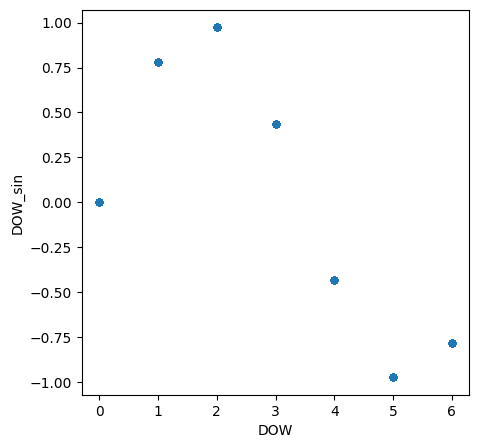

In [24]:
appendix.plot.scatter(x = "DOW", y = "DOW_sin", figsize=(5, 5))

### This does not work for even values

If the cycle of the feature is evenly quantized, we get the ambiguous results:

In [25]:
appendix["HOD"] = data["datetime"].dt.hour
appendix["HOD_sin"] = data["datetime"].dt.hour.map(lambda x : sin(2.0*pi*x/24))

<Axes: xlabel='HOD', ylabel='HOD_sin'>

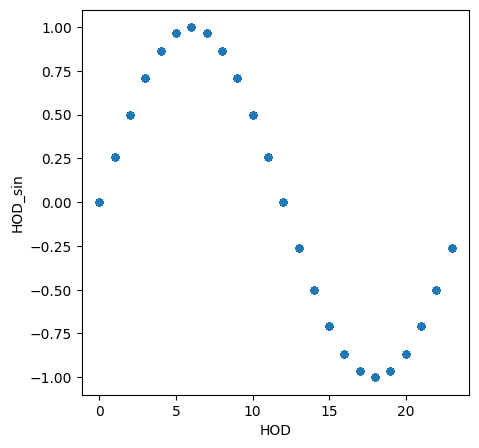

In [27]:
appendix.plot.scatter(x = "HOD", y = "HOD_sin", figsize=(5, 5))

## A.2 Comparing Advantages and Disadvantages of sin/cos encoding 
In cases, where this is applicable, a half period of the sin or cos are also sufficient. Keep in mind, that for the full wave encoding, we already have a zero mean feature

### A.2.1 Sin/Cos Encoding creates two distinct features from one

As the original feature, e.g. day of the week, is only a single element in the feature vector the sin/cos encoding creates two distinct features. 

This is disadvantageous for algorithms that create linear decision boundaries on a feature by feature evaluation, e.g. decision trees and its relatives. In those cases a simple numerical encoding as ordinal value is sufficient as these algorithms can properly evaluate these encodings. Background is, that a decision tree (random forest, ...) is not computing a distance measure but makes "if-else" decisions on a per-feature level.

### A.2.2 Sin/Cos Encoding makes cyclic features computable in distance calculations

Although the dimension of the feature vector is increased by one, the advantage of the Sin/Cos Encoding is, that the encoded cyclic feature can be used in distance calculations.

This makes the encoding useful for all types of algorithms that rely on some type of distance metric or related computations, e.g. k-NN, SVC, ANN

Still, the distance calculation is not 100% perfect, as the derivative of the encoding is not constant, i.e. <br>
$g(x) = (\sin(x), \cos(x) )$<br>
$\frac{dg}{dx} = (\cos(x), -\sin(x) )$
Hence, the distance between points are not linear, when the argument is linearly increasing.

In [28]:
import math as m
x = [i for i in range(0, 23)]
# distance between increasing elemtents and the start of the sequence
y = [m.sqrt((m.sin(0)-m.sin(x))**2 + (m.cos(0)-m.cos(x))**2) for x in x] 

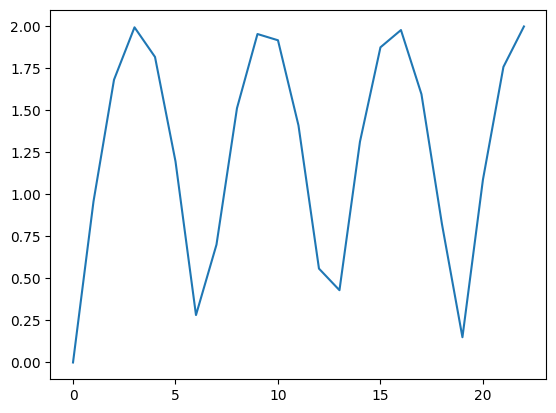

In [29]:
plt.plot(x, y)

The distance between the points would be optimally increasing linearly and decrease linearly again. But this would be impossible if we want to realize the cyclic property.

In [22]:
yd = [y[i]-y[i-1] for i in range(1,12)]

In [23]:
display(list(zip(y, yd)))

[(0.0, 0.9588510772084059),
 (0.9588510772084059, 0.7240908924073871),
 (1.682941969615793, 0.31204800359231566),
 (1.9949899732081087, -0.17639511955674525),
 (1.8185948536513634, -0.6216505654434503),
 (1.196944288207913, -0.9147042720881786),
 (0.2822400161197344, 0.41932643925950525),
 (0.7015664553792397, 0.8120385352366167),
 (1.5136049906158564, 0.44145524471433784),
 (1.9550602353301942, -0.03721168600391733),
 (1.917848549326277, -0.5067678981854931)]

### A 2.3 Choice of the proper scaling factor

For the coding to work, the proper scaling factor must be chosen to reflect the total steps of the cycle of the feature. E.g. the days in a week cylcle has a value of 7 (starting with day 0, ending with day 6). The hours of a day cycle has a value of 24 (starting at hour 0 and ending with hour 23).

The scaling must then be done in a way that reflects the cycle and avoids ambiguous values, e.g. hours of day:<br>
$f(x) = (\sin(\frac{2\cdot\pi\cdot x}{\operatorname{card}(x)}), \cos(\frac{2\cdot\pi\cdot x}{\operatorname{card}(x)}))$

Note, that sometimes the value of $ \operatorname{card}(x) - 1 $ could be found. But this would lead to a double encoding of the last and first element of the cycle.

If the enumeration is starting at a different value than zero, then the coding must reflect that offset $h$ from zero<br>
$f(h) = (\sin(\frac{2\cdot\pi\cdot (x-h)}{\operatorname{card}(x)}), \cos(\frac{2\cdot\pi\cdot (x-h)}{\operatorname{card}(x)}))$